In [6]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [9]:
model = hub.load('https://kaggle.com/models/google/arbitrary-image-stylization-v1/frameworks/TensorFlow1/variations/256/versions/1')

In [10]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [17]:
content_image = load_image('ronaldo.jpg')
style_image = load_image('newdesign.jpg')

In [18]:
content_image.shape

TensorShape([1, 1053, 805, 3])

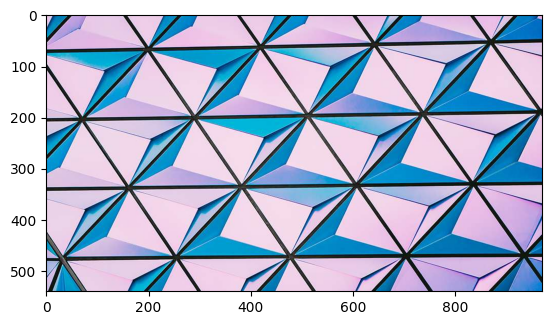

In [19]:
plt.imshow(np.squeeze(style_image))
plt.show()

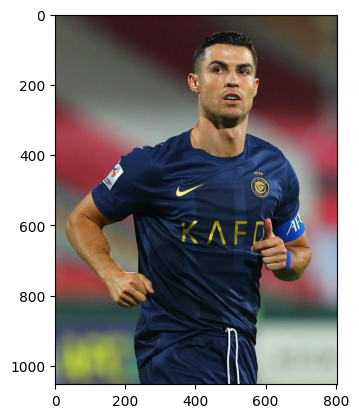

In [20]:
plt.imshow(np.squeeze(content_image))
plt.show()

In [21]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

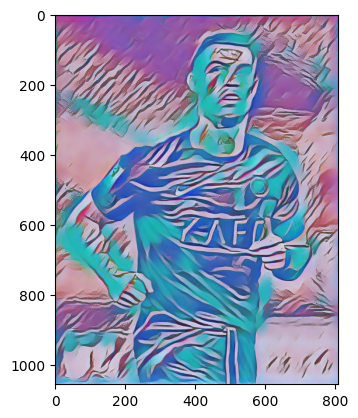

In [24]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [25]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True